### Importación de datos



In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
#url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
#url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
#url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

url1 = "/content/drive/MyDrive/Alura/challenge1-data-science-latam-main/base-de-datos-challenge1-latam/tienda_1 .csv"
url2 = "/content/drive/MyDrive/Alura/challenge1-data-science-latam-main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "/content/drive/MyDrive/Alura/challenge1-data-science-latam-main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "/content/drive/MyDrive/Alura/challenge1-data-science-latam-main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

for i in range(1, 5):
    tiendai = globals()[f'tienda{i}']
    print(f"Tienda {i}:")
    print(tiendai.shape)
    print(tiendai.head())

Tienda 1:
(2359, 12)
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  

#1. Análisis de facturación



Ingreso total tienda 1: $1,150,880,400.00
Ingreso total tienda 2: $1,116,343,500.00
Ingreso total tienda 3: $1,098,019,600.00
Ingreso total tienda 4: $1,038,375,700.00


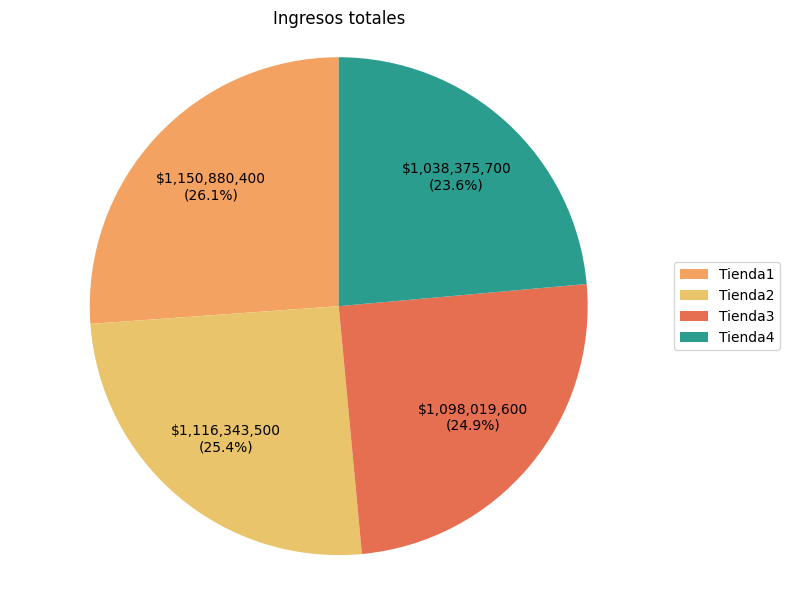

In [138]:
listaPrecios = []
listaTienda = []
for i in range(1, 5):
    tiendai = globals()[f'tienda{i}']
    ingresoTotal = tiendai["Precio"].sum()
    listaTienda.append(f"Tienda{i}")
    listaPrecios.append(int(ingresoTotal))
    print(f"Ingreso total tienda {i}: ${ingresoTotal:,.2f}")

# Datos del gráfico
labels = listaTienda
sizes = listaPrecios
total = sum(sizes)

# Colores para las categorías
colors = ['#f4a261','#e9c46a', '#e76f51', '#2a9d8f', '#FF6961', '#CFCFC4', '#FDFD96', '#B39EB5']

# Crear gráfico
plt.figure(figsize=(8, 6))
wedges, texts = plt.pie(sizes, colors=colors, startangle=90)

# Agregar etiquetas personalizadas con valores numéricos
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 + wedge.theta1) / 2
    x = wedge.r * 0.7 * np.cos(np.deg2rad(ang))
    y = wedge.r * 0.7 * np.sin(np.deg2rad(ang))
    porcentaje = (sizes[i] / total) * 100
    plt.text(x, y, f'${sizes[i]:,}\n({porcentaje:.1f}%)', ha='center', va='center', fontsize=10)
plt.title("Ingresos totales")

# Agregar leyenda
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Asegurar proporción circular
plt.axis('equal')

# Mostrar gráfico
plt.tight_layout()
plt.show()



# 2. Ventas por categoría

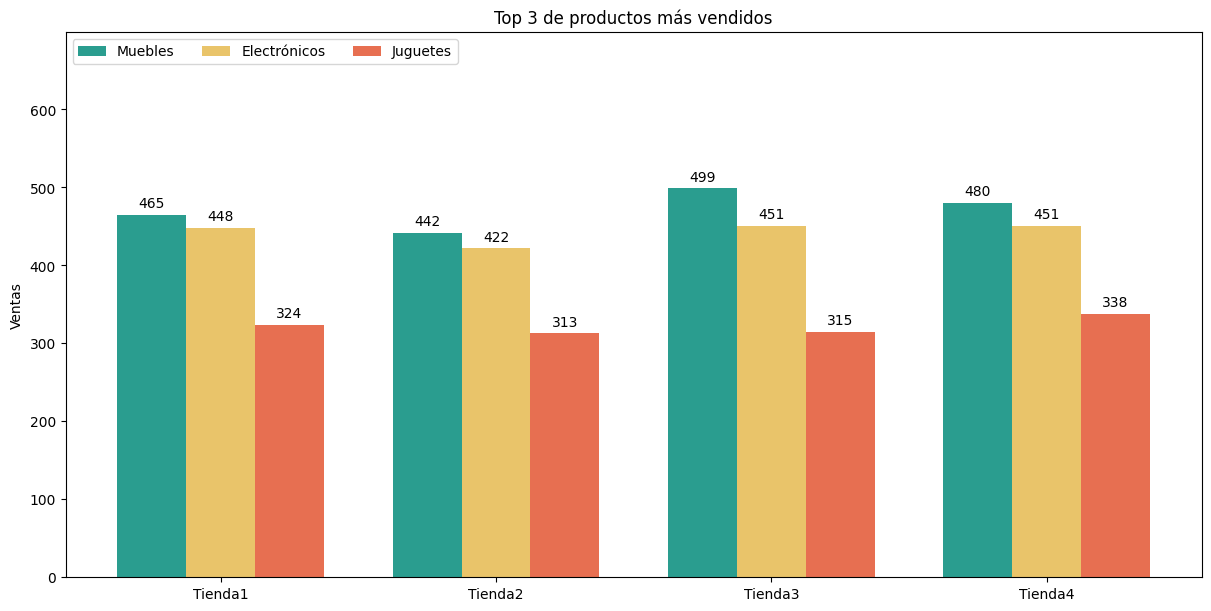

In [139]:
topCategoria = []
topProduc = []
topCategoria1 = []
topProduc1 = []
topCategoria2 = []
topProduc2 = []
listaTienda = []

for i in range(1, 5):
    tiendai = globals()[f'tienda{i}']
    listaTienda.append(f"Tienda{i}")

    ventasCategoriai = tiendai.groupby("Categoría del Producto")["Producto"].count().reset_index()
    ventasCategoriai = ventasCategoriai.rename(columns={"Producto": "Cantidad de ventas"})
    ventasCategoriai = ventasCategoriai.sort_values(by="Cantidad de ventas", ascending=False)

    topCategoria.append(ventasCategoriai.iloc[0]['Categoría del Producto'])
    topProduc.append(int(ventasCategoriai.iloc[0]['Cantidad de ventas']))
    topCategoria1.append(ventasCategoriai.iloc[1]['Categoría del Producto'])
    topProduc1.append(int(ventasCategoriai.iloc[1]['Cantidad de ventas']))
    topCategoria2.append(ventasCategoriai.iloc[2]['Categoría del Producto'])
    topProduc2.append(int(ventasCategoriai.iloc[2]['Cantidad de ventas']))

totalCategorias = topCategoria + topCategoria1 + topCategoria2
totalPrecios = topProduc + topProduc1 + topProduc2

categorias = {}

for t, precio in zip(totalCategorias, totalPrecios):
    if t in categorias:
        categorias[t].append(precio)
    else:
        categorias[t] = [precio]

tiendas = listaTienda
categorias = categorias
x = np.arange(len(tiendas))
ancho = 0.25
cont = 0

# Lista de colores
colores = ['#2a9d8f', '#e9c46a', '#e76f51']

# Aumentar el tamaño de la gráfica
fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')

for (atributo, medicion), color in zip(categorias.items(), colores):
    offset = ancho * cont
    rects = ax.bar(x + offset, medicion, ancho, label=atributo, color=color)
    ax.bar_label(rects, padding=3)
    cont += 1

ax.set_ylabel('Ventas')
ax.set_title('Top 3 de productos más vendidos')

# Centrar etiquetas con offset
centro_offset = ancho * (len(categorias) - 1) / 2
ax.set_xticks(x + centro_offset)
ax.set_xticklabels(tiendas)

ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, max(max(valores) for valores in categorias.values()) + 200)


plt.show()

In [140]:
totalCategorias = topCategoria + topCategoria1 + topCategoria2
totalPrecios = topProduc + topProduc1 + topProduc2

categorias = {}

for t, precio in zip(totalCategorias, totalPrecios):
    if t in categorias:
        categorias[t].append(precio)
    else:
        categorias[t] = [precio]
categorias

{'Muebles': [465, 442, 499, 480],
 'Electrónicos': [448, 422, 451, 451],
 'Juguetes': [324, 313, 315, 338]}

# 3. Calificación promedio de la tienda


La calificación promedio de los clientes en la tienda 1 es: 3.98
La calificación promedio de los clientes en la tienda 2 es: 4.04
La calificación promedio de los clientes en la tienda 3 es: 4.05
La calificación promedio de los clientes en la tienda 4 es: 4.00


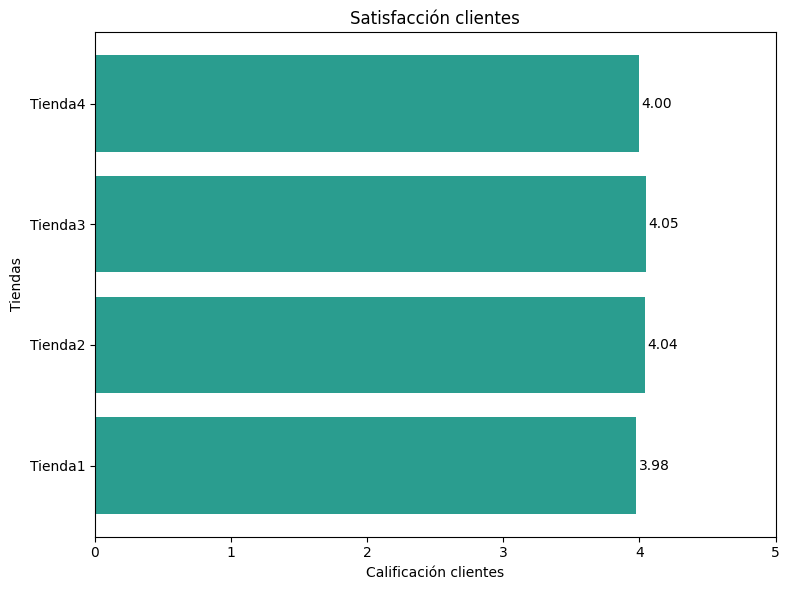

In [141]:
listaPrecios = []
listaTienda = []
for i in range(1, 5):
    tiendai = globals()[f'tienda{i}']
    listaTienda.append(f"Tienda{i}")
    calificacionPromedio = tiendai["Calificación"].mean()
    listaPrecios.append(float(calificacionPromedio))
    print(f"La calificación promedio de los clientes en la tienda {i} es: {calificacionPromedio:.2f}")
#print(listaTienda)
#print(listaPrecios)

# Datos dinámicos (puedes agregar más sin modificar el código)
tiendas = listaTienda
promedios = listaPrecios

# Convertir a array de numpy por si se desea hacer cálculos después
promedios_np = np.array(promedios)

# Crear gráfico de barras horizontales
plt.figure(figsize=(8, 6))
plt.barh(tiendas, promedios_np, color='#2a9d8f')

# Añadir detalles
plt.title('Satisfacción clientes')
plt.xlabel('Calificación clientes')
plt.ylabel('Tiendas')
plt.xlim(0, 5)  # Rango típico de calificación

# Mostrar los valores al final de cada barra
for i, valor in enumerate(promedios_np):
    plt.text(valor + 0.02, i, f'{valor:.2f}', va='center')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [142]:
listCatMasVend = []
listCatMenosVend = []
listCanMasVend = []
listCanMenosVend = []
listaTienda = []

for i in range(1, 5):
    tiendai = globals()[f'tienda{i}']
    listaTienda.append(f"Tienda{i}")

    # Agrupar por categoría y contar la cantidad de productos vendidos
    ventasCategoriai = tiendai.groupby("Categoría del Producto")["Producto"].count().reset_index()

    # Renombrar la columna para mayor claridad
    ventasCategoriai = ventasCategoriai.rename(columns={"Producto": "Cantidad de ventas"})

    # Ordenar de mayor a menor
    ventasCategoriai = ventasCategoriai.sort_values(by="Cantidad de ventas", ascending=False)

    categoriaMasVendidai = ventasCategoriai.iloc[0]['Categoría del Producto']
    listCatMasVend.append(categoriaMasVendidai)
    cantidadMasVendidai = ventasCategoriai.iloc[0]['Cantidad de ventas']
    listCanMasVend.append(int(cantidadMasVendidai))

    categoriaMenosVendidai = ventasCategoriai.iloc[-1]['Categoría del Producto']
    listCatMenosVend.append((categoriaMenosVendidai))
    cantidadMenosVendidai = ventasCategoriai.iloc[-1]['Cantidad de ventas']
    listCanMenosVend.append(int(cantidadMenosVendidai))

    print(f"En la tienda{i} la categoría más vendida es {categoriaMasVendidai} con {cantidadMasVendidai} ventas")
    print(f"En la tienda{i} la categoría menos vendida es {categoriaMenosVendidai} con {cantidadMenosVendidai} ventas")



En la tienda1 la categoría más vendida es Muebles con 465 ventas
En la tienda1 la categoría menos vendida es Artículos para el hogar con 171 ventas
En la tienda2 la categoría más vendida es Muebles con 442 ventas
En la tienda2 la categoría menos vendida es Artículos para el hogar con 181 ventas
En la tienda3 la categoría más vendida es Muebles con 499 ventas
En la tienda3 la categoría menos vendida es Instrumentos musicales con 177 ventas
En la tienda4 la categoría más vendida es Muebles con 480 ventas
En la tienda4 la categoría menos vendida es Instrumentos musicales con 170 ventas


In [143]:
totalCategorias = listCatMasVend + listCatMenosVend
totalPrecios = listCanMasVend + listCanMenosVend

categorias = {}

for t, precio in zip(totalCategorias, totalPrecios):
    if t in categorias:
        categorias[t].append(precio)
    else:
        categorias[t] = [precio]
categorias['Artículos para el hogar'].append(0)
categorias['Artículos para el hogar'].append(0)
categorias['Instrumentos musicales'].insert(0, 0)
categorias['Instrumentos musicales'].insert(0, 0)

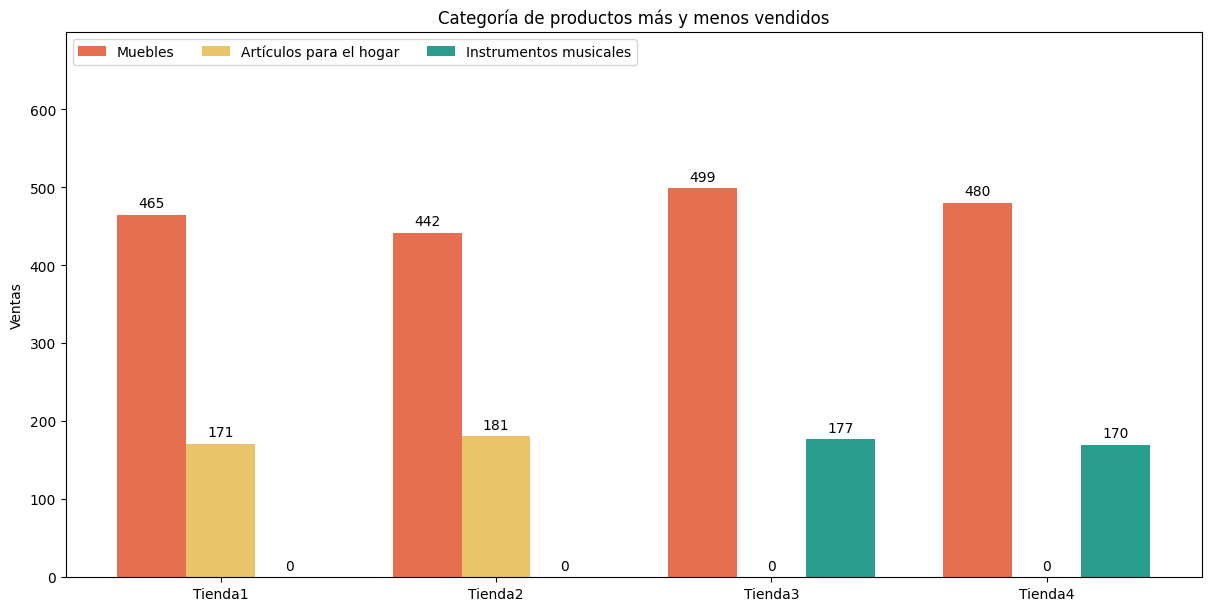

In [144]:
tiendas = listaTienda
categorias = categorias
x = np.arange(len(tiendas))
ancho = 0.25
cont = 0

# Lista de colores
colores = ['#e76f51', '#e9c46a','#2a9d8f', ]

# Aumentar el tamaño de la gráfica
fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')

for (atributo, medicion), color in zip(categorias.items(), colores):
    offset = ancho * cont
    rects = ax.bar(x + offset, medicion, ancho, label=atributo, color=color)
    ax.bar_label(rects, padding=3)
    cont += 1

ax.set_ylabel('Ventas')
ax.set_title('Categoría de productos más y menos vendidos')

# Centrar etiquetas con offset
centro_offset = ancho * (len(categorias) - 1) / 2
ax.set_xticks(x + centro_offset)
ax.set_xticklabels(tiendas)

ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, max(max(valores) for valores in categorias.values()) + 200)


plt.show()

In [145]:
mi_diccionario = {'Muebles': [465, 442, 499, 480], 'Artículos para el hogar': [171, 181], 'Instrumentos musicales': [177, 170]}

# Para agregar un nuevo precio a la lista de 'Artículos para el hogar', por ejemplo, 195:
mi_diccionario['Artículos para el hogar'].append(195)
print(f"Diccionario después de agregar a 'Artículos para el hogar': {mi_diccionario}")

# Para agregar un nuevo precio a la lista de 'Instrumentos musicales', por ejemplo, 165:
mi_diccionario['Instrumentos musicales'].append(165)
print(f"Diccionario después de agregar a 'Instrumentos musicales': {mi_diccionario}")

Diccionario después de agregar a 'Artículos para el hogar': {'Muebles': [465, 442, 499, 480], 'Artículos para el hogar': [171, 181, 195], 'Instrumentos musicales': [177, 170]}
Diccionario después de agregar a 'Instrumentos musicales': {'Muebles': [465, 442, 499, 480], 'Artículos para el hogar': [171, 181, 195], 'Instrumentos musicales': [177, 170, 165]}


In [146]:
mi_diccionario = {'Muebles': [465, 442, 499, 480], 'Artículos para el hogar': [171, 181], 'Instrumentos musicales': [177, 170]}

# Para agregar un nuevo precio al inicio de la lista de 'Artículos para el hogar', por ejemplo, 195:
mi_diccionario['Artículos para el hogar'].insert(0, 195)
print(f"Diccionario después de agregar al inicio de 'Artículos para el hogar': {mi_diccionario}")

# Para agregar un nuevo precio al inicio de la lista de 'Instrumentos musicales', por ejemplo, 165:
mi_diccionario['Instrumentos musicales'].insert(0, 165)
print(f"Diccionario después de agregar al inicio de 'Instrumentos musicales': {mi_diccionario}")

Diccionario después de agregar al inicio de 'Artículos para el hogar': {'Muebles': [465, 442, 499, 480], 'Artículos para el hogar': [195, 171, 181], 'Instrumentos musicales': [177, 170]}
Diccionario después de agregar al inicio de 'Instrumentos musicales': {'Muebles': [465, 442, 499, 480], 'Artículos para el hogar': [195, 171, 181], 'Instrumentos musicales': [165, 177, 170]}


# 5. Envío promedio por tienda

In [147]:
listaTienda = []
listaenvioPromedio = []
for i in range(1, 5):
    tiendai = globals()[f'tienda{i}']
    listaTienda.append(f"Tienda{i}")
    envioPromedio = tiendai["Costo de envío"].mean()
    listaenvioPromedio.append(float(envioPromedio))
    print(f"La catidad promedio de los envios en tienda {i} son: ${envioPromedio:,.2f}")
print (listaTienda)
print(listaenvioPromedio)

La catidad promedio de los envios en tienda 1 son: $26,018.61
La catidad promedio de los envios en tienda 2 son: $25,216.24
La catidad promedio de los envios en tienda 3 son: $24,805.68
La catidad promedio de los envios en tienda 4 son: $23,459.46
['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']
[26018.60958033065, 25216.235693090293, 24805.680373039424, 23459.457167090754]


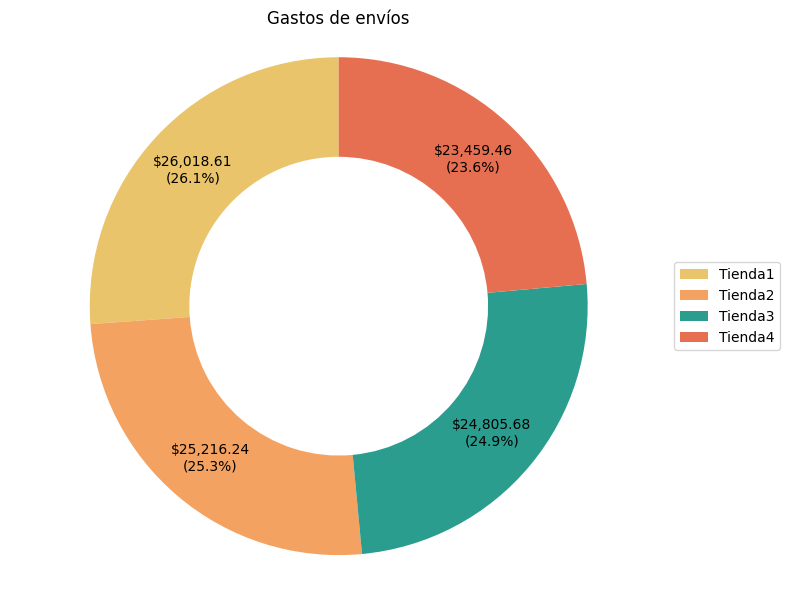

In [148]:
# Datos del gráfico
labels = listaTienda
sizes = listaenvioPromedio
total = sum(sizes)

# Colores para las categorías
colors = ['#e9c46a', '#f4a261', '#2a9d8f', '#e76f51', '#FF6961', '#CFCFC4', '#FDFD96', '#B39EB5']

# Crear gráfico tipo dona
plt.figure(figsize=(8, 6))
wedges, texts = plt.pie(
    sizes,
    colors=colors,
    startangle=90,
    wedgeprops={'width': 0.4}  # Donut style
)

# Agregar etiquetas personalizadas con valores numéricos
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 + wedge.theta1) / 2
    x = wedge.r * 0.8 * np.cos(np.deg2rad(ang))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(ang))
    porcentaje = (sizes[i] / total) * 100
    plt.text(x, y, f'${sizes[i]:,.2f}\n({porcentaje:.1f}%)', ha='center', va='center', fontsize=10)

plt.title("Gastos de envíos")

# Agregar leyenda
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Asegurar proporción circular
plt.axis('equal')

# Mostrar gráfico
plt.tight_layout()
plt.show()



In [149]:
!pip install cartopy


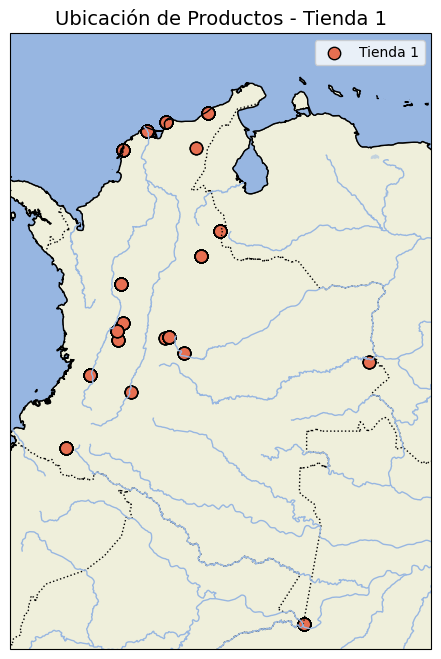

In [150]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Leer el archivo CSV
tienda = pd.read_csv(url1)

# Colores para el gráfico
color = '#e76f51'  # Cambia el color si deseas

# Crear figura y mapa
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Mapa base
ax.set_extent([-79, -66, -5, 14])  # Limitar el mapa a las coordenadas de Colombia
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Graficar los puntos de la tienda
ax.scatter(
    tienda['lon'], tienda['lat'],
    label="Tienda 1",  # Aquí se puede cambiar el nombre según la tienda
    color=color,
    edgecolor='black',
    s=80,
    transform=ccrs.PlateCarree()
)

# Personalizar gráfico
plt.title("Ubicación de Productos - Tienda 1", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()



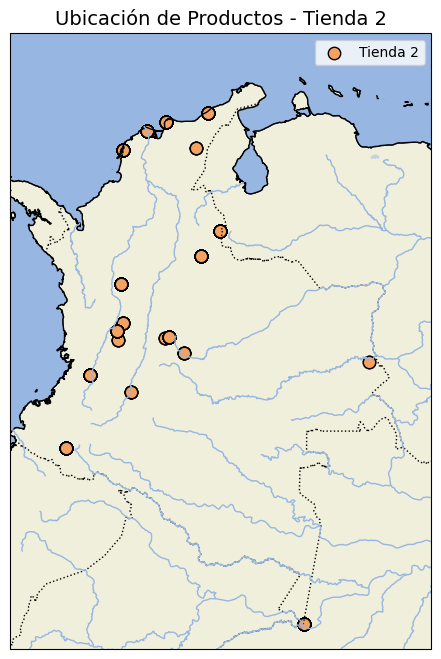

In [151]:
# Leer el archivo CSV
tienda = pd.read_csv(url2)

# Colores para el gráfico
color = '#f4a261'  # Cambia el color si deseas

# Crear figura y mapa
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Mapa base
ax.set_extent([-79, -66, -5, 14])  # Limitar el mapa a las coordenadas de Colombia
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Graficar los puntos de la tienda
ax.scatter(
    tienda['lon'], tienda['lat'],
    label="Tienda 2",  # Aquí se puede cambiar el nombre según la tienda
    color=color,
    edgecolor='black',
    s=80,
    transform=ccrs.PlateCarree()
)

# Personalizar gráfico
plt.title("Ubicación de Productos - Tienda 2", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


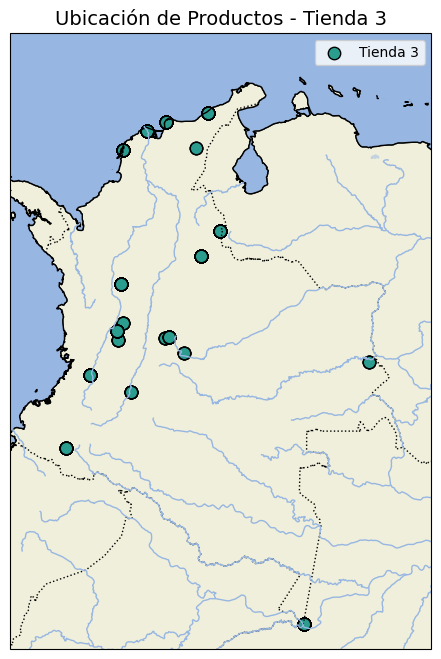

In [152]:
# Leer el archivo CSV
tienda = pd.read_csv(url3)

# Colores para el gráfico
color = '#2a9d8f'  # Cambia el color si deseas

# Crear figura y mapa
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Mapa base
ax.set_extent([-79, -66, -5, 14])  # Limitar el mapa a las coordenadas de Colombia
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Graficar los puntos de la tienda
ax.scatter(
    tienda['lon'], tienda['lat'],
    label="Tienda 3",  # Aquí se puede cambiar el nombre según la tienda
    color=color,
    edgecolor='black',
    s=80,
    transform=ccrs.PlateCarree()
)

# Personalizar gráfico
plt.title("Ubicación de Productos - Tienda 3", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

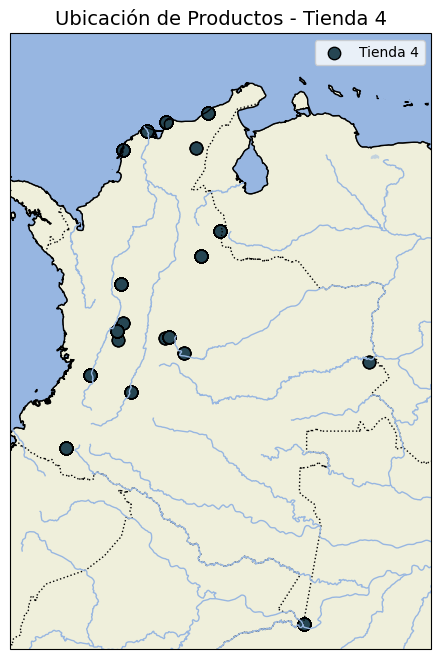

In [153]:
# Leer el archivo CSV
tienda = pd.read_csv(url4)

# Colores para el gráfico
color = '#264653'  # Cambia el color si deseas

# Crear figura y mapa
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Mapa base
ax.set_extent([-79, -66, -5, 14])  # Limitar el mapa a las coordenadas de Colombia
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Graficar los puntos de la tienda
ax.scatter(
    tienda['lon'], tienda['lat'],
    label="Tienda 4",  # Aquí se puede cambiar el nombre según la tienda
    color=color,
    edgecolor='black',
    s=80,
    transform=ccrs.PlateCarree()
)

# Personalizar gráfico
plt.title("Ubicación de Productos - Tienda 4", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

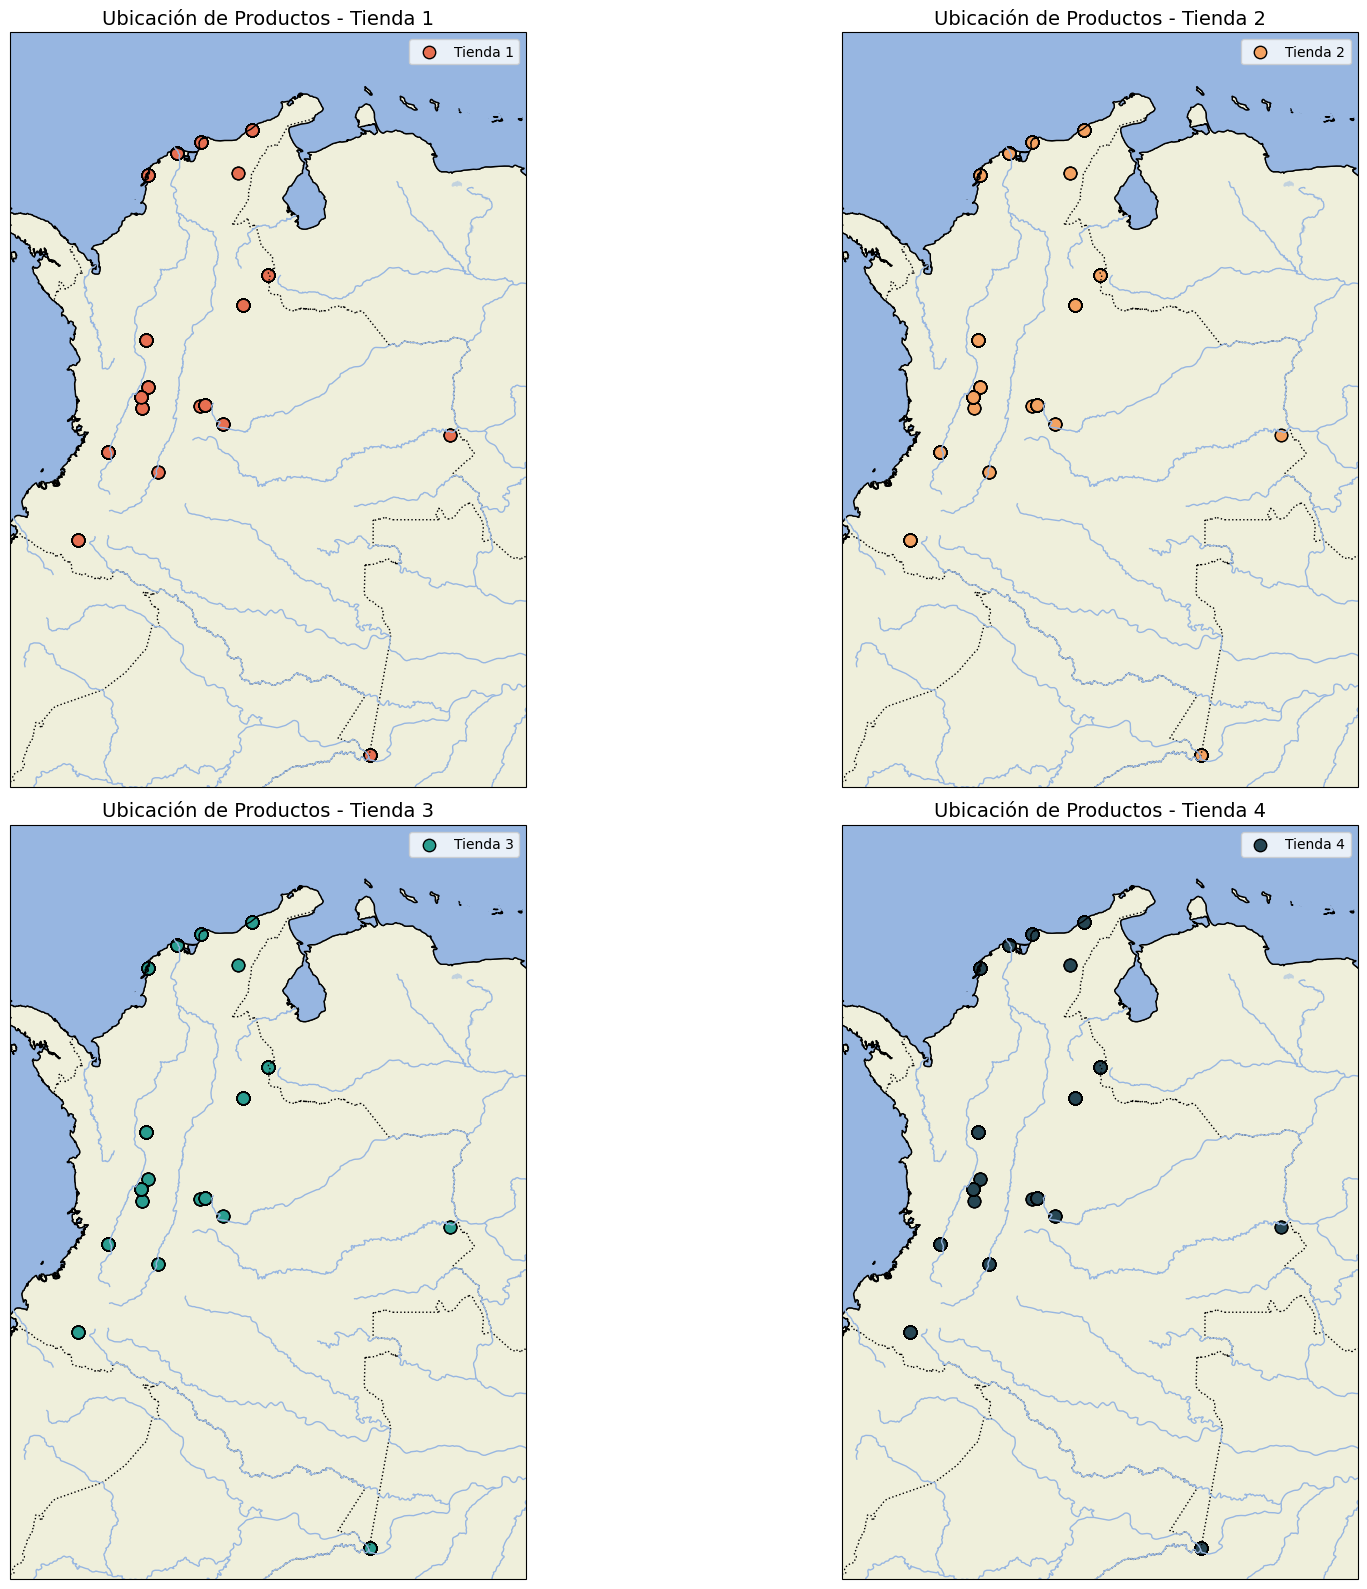

In [154]:
# Leer los archivos CSV
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Configuración de colores y títulos
tiendas = [
    (tienda1, 'Tienda 1', '#e76f51'),
    (tienda2, 'Tienda 2', '#f4a261'),
    (tienda3, 'Tienda 3', '#2a9d8f'),
    (tienda4, 'Tienda 4', '#264653')
]

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 16), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()  # Aplanar la matriz de ejes para fácil iteración

# Limites del mapa (Colombia)
extent = [-79, -66, -5, 14]

# Dibujar cada tienda en su subplot
for i, (tienda, nombre, color) in enumerate(tiendas):
    ax = axs[i]
    ax.set_extent(extent)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    ax.scatter(
        tienda['lon'], tienda['lat'],
        label=nombre,
        color=color,
        edgecolor='black',
        s=80,
        transform=ccrs.PlateCarree()
    )

    ax.set_title(f"Ubicación de Productos - {nombre}", fontsize=14)
    ax.legend()
    ax.grid(True)

# Ajustar espacios
plt.tight_layout()
plt.show()
